<a href="https://colab.research.google.com/github/Debora96/ArticleXAI/blob/main/Article_XIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the dataset
from google.colab import files

uploaded = files.upload()

Saving LUSC_ALL.csv to LUSC_ALL.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['LUSC_ALL.csv']))
print(df)

    neoplasm metastasis ajcc.stage  obs.time  status   age  gender  prior.dx  \
0         N1         M0        T2b       455       1  62.0       1         0   
1         N0         M0        T1b       247       0  56.0       1         0   
2         N0         MX        T1b       378       0  74.0       1         0   
3         N0         M0        T2b       544       1  76.0       1         1   
4         N0         M0        T2a        55       0  68.0       1         0   
..       ...        ...        ...       ...     ...   ...     ...       ...   
488       N1        NaN         T4        12       1  65.0       1         0   
489       NX         M0        T1a       910       0  60.0       0         0   
490       N1         MX        T2a        82       0  45.0       0         0   
491       N1         M1         T4       716       1  73.0       1         0   
492       N1         M0         T2       358       1  56.0       1         0   

          GCLC     WNT16  ...  LINC0166

In [3]:
rotulos_unicos = df['ajcc.stage'].unique()

# Imprimindo os rótulos únicos
print(rotulos_unicos)

['T2b' 'T1b' 'T2a' 'T2' 'T1' 'T1a' 'T3' 'T4']


In [4]:
mapeamento = {'T1': 0, 'T1a': 0,'T1b':0,'T2':0,'T2a':0,'T2b':0,'T3':1,'T4':1}

# Substituir os rótulos 'T1' e 'T1a' pelo rótulo '1'
df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)

<ipython-input-4-de37a9439484>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)


In [5]:
df.head()

,neoplasm,metastasis,ajcc.stage,obs.time,status,age,gender,prior.dx,GCLC,WNT16,...,LINC01667,CH507.42P11.6,KCNIP4.IT1,SH3PXD2A.AS1,PCAT5,LINC01202,ELDR,SCHLAP1,LINC00891,PAUPAR
0,N1,M0,0,455,1,62.0,1,0,13.535154,5.857981,...,2.321928,2.000000,1.584963,8.764872,0.0,3.000000,0.0,3.700440,2.807355,1.0
1,N0,M0,0,247,0,56.0,1,0,12.279320,2.321928,...,4.459432,2.321928,0.000000,3.169925,1.0,4.000000,0.0,0.000000,2.584963,0.0
2,N0,MX,0,378,0,74.0,1,0,12.867279,5.954196,...,5.129283,2.321928,1.000000,7.930737,1.0,1.000000,3.0,3.807355,4.169925,0.0
3,N0,M0,0,544,1,76.0,1,1,10.674192,6.375039,...,0.000000,0.000000,1.000000,7.383704,0.0,1.584963,1.0,5.169925,2.807355,0.0
4,N0,M0,0,55,0,68.0,1,0,10.673309,6.087463,...,0.000000,4.169925,1.000000,6.672425,0.0,3.459432,0.0,0.000000,3.700440,0.0


In [6]:
contagem_por_classe = df['ajcc.stage'].value_counts()

# Exibir a contagem por classe
print(contagem_por_classe)

ajcc.stage
0    400
1     93
Name: count, dtype: int64


In [7]:
Genes_all = ["ALDH3B1","ALG1L","APC","C7","CAV1","CENPI","CST1","EPHA6","FAM83A","FOSB","GABRP","GJB6","GKN2","GPRC5A","GTSF1","H2AC14","IRS1","KREMEN2","LARGE2","LINC00887","LINC01910","LINC02605","LY6D","MAGEA10","MAGI2","MMP20","PCAT7","PITX2","TLX3","TNS4","WSCD2",

"LINC00640","KRT17P1","GSDMC","EIF4G1","FOXG1","H2BC9","HMGB3P6","CSTL1","ATF7IP","RNF222","EGF","GCGR","KRT75","TMPRSS11D","SBSN","VIL1","BMP7","TFAP2A","PLXNB3","CDT1","COL9A3","TMPRSS4","LINC02830","DSEL","NLGN1","GNG4","SLC9A2",

"IL6","PPFIA4","CACNA1I","CDKN2A","PLAAT1","C14orf39","LINC01549","ONECUT3","PRSS3","IMPDH1P8","KIAA0895LP1","RCOR2","FAM72C","RAD51AP2","SMC1B","FTCD","PPP1R27","GINS2","WNK2","COL4A3","ESCO2","SH2D5","AQP1","MYOSLID","PDE10A","DUXAP9","NLRP10","VCAN","NUS1P2"]

In [8]:
df_all = df[Genes_all]
print(df_all)

       ALDH3B1      ALG1L        APC         C7       CAV1     CENPI  \
0     8.971544   9.209453  10.596190   8.851749  11.576957  9.231221   
1     9.807355   9.219169   7.584963   5.807355   9.807355  7.965784   
2    10.500842   8.703904  10.844706  11.872675  12.721313  8.867279   
3     9.556506   8.558421   9.008429  14.112847  13.756244  7.912889   
4     9.375039   9.566054  10.011227  11.294046  13.635718  6.108524   
..         ...        ...        ...        ...        ...       ...   
488   7.982994  10.807355  10.997885   9.355351  10.793603  8.870365   
489  10.556506   3.584963   9.813781  10.821774  12.286847  6.539159   
490   9.388017  10.019591  10.882643  11.859146  13.428491  9.368506   
491   9.219169  10.767357   9.957102   9.400879  14.595316  8.734710   
492   9.211888  11.801304   9.696968  10.278449  10.388017  8.447083   

          CST1     EPHA6     FAM83A       FOSB  ...    COL4A3      ESCO2  \
0     9.002815  3.000000  11.292897   8.413628  ...  6.9425

In [9]:
data = pd.DataFrame(df)


#Preparing input and output variables
X = df_all
y = data[data.columns[2:3]]

In [10]:
print(y)

     ajcc.stage
0             0
1             0
2             0
3             0
4             0
..          ...
488           1
489           0
490           0
491           1
492           0

[493 rows x 1 columns]


**Recursive Feature Elimination**

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np

min_features_to_select = 5 # Minimum number of features to consider
clf = LogisticRegression(max_iter=2000)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, np.squeeze(y))

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 38


In [12]:
print(f"Optimal number of features: {rfecv.ranking_}")

Optimal number of features: [ 1  1 44  1  1  1 32 20 38  5 33 45  1  1 50  1  2 24  6  1 21 26 27 22
 36  1  1 42 15  1 48 37  1  1 40 28 41  1  1  3 10  9  1 46 39 47 11  1
  1  1  1  1  1  1 31  4  1 35 49  1  1 17  1 43 23  1 13  1 34  1 16 12
 18  1  1  1 30 25  1 14  8  1  1  1  7 19 29]


In [13]:
rfecv.get_feature_names_out(input_features=None)

array(['ALDH3B1', 'ALG1L', 'C7', 'CAV1', 'CENPI', 'GKN2', 'GPRC5A',
       'H2AC14', 'LINC00887', 'MMP20', 'PCAT7', 'TNS4', 'KRT17P1',
       'GSDMC', 'HMGB3P6', 'CSTL1', 'GCGR', 'BMP7', 'TFAP2A', 'PLXNB3',
       'CDT1', 'COL9A3', 'TMPRSS4', 'LINC02830', 'GNG4', 'PPFIA4',
       'CACNA1I', 'PLAAT1', 'ONECUT3', 'IMPDH1P8', 'RCOR2', 'FTCD',
       'PPP1R27', 'GINS2', 'ESCO2', 'MYOSLID', 'PDE10A', 'DUXAP9'],
      dtype=object)

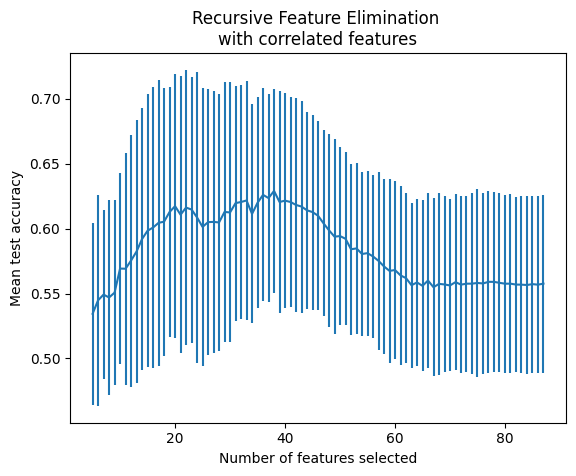

In [14]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


In [15]:
Genes_selc = ['ALDH3B1', 'ALG1L', 'C7', 'CAV1', 'CENPI', 'GKN2', 'GPRC5A',
       'H2AC14', 'LINC00887', 'MMP20', 'PCAT7', 'TNS4', 'KRT17P1',
       'GSDMC', 'HMGB3P6', 'CSTL1', 'GCGR', 'BMP7', 'TFAP2A', 'PLXNB3',
       'CDT1', 'COL9A3', 'TMPRSS4', 'LINC02830', 'GNG4', 'PPFIA4',
       'CACNA1I', 'PLAAT1', 'ONECUT3', 'IMPDH1P8', 'RCOR2', 'FTCD',
       'PPP1R27', 'GINS2', 'ESCO2', 'MYOSLID', 'PDE10A', 'DUXAP9']

In [16]:
df_selc = df[Genes_selc]
print(df_selc)


       ALDH3B1      ALG1L         C7       CAV1     CENPI      GKN2  \
0     8.971544   9.209453   8.851749  11.576957  9.231221  0.000000   
1     9.807355   9.219169   5.807355   9.807355  7.965784  2.584963   
2    10.500842   8.703904  11.872675  12.721313  8.867279  0.000000   
3     9.556506   8.558421  14.112847  13.756244  7.912889  6.409391   
4     9.375039   9.566054  11.294046  13.635718  6.108524  5.285402   
..         ...        ...        ...        ...       ...       ...   
488   7.982994  10.807355   9.355351  10.793603  8.870365  3.000000   
489  10.556506   3.584963  10.821774  12.286847  6.539159  8.247928   
490   9.388017  10.019591  11.859146  13.428491  9.368506  5.169925   
491   9.219169  10.767357   9.400879  14.595316  8.734710  1.584963   
492   9.211888  11.801304  10.278449  10.388017  8.447083  3.807355   

        GPRC5A    H2AC14  LINC00887     MMP20  ...   ONECUT3  IMPDH1P8  \
0    12.834274  3.459432   6.392317  2.807355  ...  5.554589  3.321928   

In [17]:
data = pd.DataFrame(df)

In [18]:
#Preparing input and output variables
X = df_selc
y = data[data.columns[2:3]]

In [19]:
pip install shap

**TESTES DE BALANCEAMENTO**

Resultados Não Balanceados

In [20]:
import sklearn

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [21]:
y = y.values.ravel()

In [22]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
# KNN
knn = sklearn.neighbors.KNeighborsClassifier()


# Realizar a validação cruzada com 5 folds
scores_knn = cross_val_score(knn, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(knn, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_knn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.7890331890331891
F1 scores por fold: [0.1        0.         0.         0.         0.17391304]
Média do F1 score: 0.05478260869565217


In [23]:
# SVM
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)


# Realizar a validação cruzada com 10 folds
scores_svml = cross_val_score(svc_linear, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(svc_linear, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svml))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.8093382807668522
F1 scores por fold: [0.30769231 0.25       0.44444444 0.19047619 0.33333333]
Média do F1 score: 0.30518925518925516


In [24]:
# SVM
svc_rbf = sklearn.svm.SVC(kernel="rbf", probability=True)


# Realizar a validação cruzada com 10 folds
scores_svmr = cross_val_score(svc_rbf, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(svc_rbf, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svmr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.8113790970933827
F1 scores por fold: [0. 0. 0. 0. 0.]
Média do F1 score: 0.0


In [25]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")

# Realizar a validação cruzada com 10 folds
scores_lr = cross_val_score(linear_lr, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(linear_lr, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_lr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.7972376829519686
F1 scores por fold: [0.14285714 0.3030303  0.4516129  0.37037037 0.34482759]
Média do F1 score: 0.32253966113810384


In [26]:
import sklearn.tree

# Decision tree

dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)

# Realizar a validação cruzada com 10 folds
scores_dt = cross_val_score(dtree, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(dtree, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_dt))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6734075448361163
F1 scores por fold: [0.15       0.17021277 0.33333333 0.18181818 0.17391304]
Média do F1 score: 0.20185546491744458


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 10 folds
scores_rf = cross_val_score(rf_classifier, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.8032776747062462
F1 scores por fold: [0.         0.         0.0952381  0.         0.10526316]
Média do F1 score: 0.040100250626566414


In [28]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=0, max_iter=500)

# Realizar a validação cruzada com 10 folds
scores_nn = cross_val_score(nn, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(nn, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_nn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.8113790970933827
F1 scores por fold: [0. 0. 0. 0. 0.]
Média do F1 score: 0.0


In [29]:
from xgboost import XGBClassifier

# XGB
XGB = XGBClassifier()

# Realizar a validação cruzada com 5 folds
scores_XGB = cross_val_score(XGB, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(XGB, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_XGB))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.7930735930735932
F1 scores por fold: [0.18181818 0.07692308 0.30769231 0.0952381  0.        ]
Média do F1 score: 0.13233433233433234


In [30]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [31]:
import catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)

# Realizar a validação cruzada com 5 folds
scores_cat = cross_val_score(cat, X, np.squeeze(y), cv=5)
f1_scores = cross_val_score(cat, X, y, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_cat))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


0:	learn: 0.6387482	total: 71.8ms	remaining: 21.5s
1:	learn: 0.5961631	total: 86.3ms	remaining: 12.9s
2:	learn: 0.5644714	total: 102ms	remaining: 10.1s
3:	learn: 0.5369591	total: 115ms	remaining: 8.54s
4:	learn: 0.5123499	total: 129ms	remaining: 7.61s
5:	learn: 0.4893784	total: 143ms	remaining: 7.01s
6:	learn: 0.4648411	total: 157ms	remaining: 6.57s
7:	learn: 0.4482801	total: 176ms	remaining: 6.41s
8:	learn: 0.4272449	total: 189ms	remaining: 6.12s
9:	learn: 0.4177521	total: 203ms	remaining: 5.9s
10:	learn: 0.4025728	total: 223ms	remaining: 5.86s
11:	learn: 0.3925594	total: 248ms	remaining: 5.95s
12:	learn: 0.3810971	total: 268ms	remaining: 5.92s
13:	learn: 0.3749645	total: 284ms	remaining: 5.79s
14:	learn: 0.3619217	total: 297ms	remaining: 5.64s
15:	learn: 0.3485373	total: 318ms	remaining: 5.64s
16:	learn: 0.3366282	total: 334ms	remaining: 5.56s
17:	learn: 0.3279710	total: 362ms	remaining: 5.66s
18:	learn: 0.3232091	total: 375ms	remaining: 5.55s
19:	learn: 0.3133973	total: 395ms	remain


Imbalanced-learn (imblearn)

É uma biblioteca amplamente utilizada para lidar com dados desbalanceados. Contém várias técnicas de reamostragem, como sobremuestreamento (oversampling) e subamostragem (undersampling).

In [32]:
pip install imbalanced-learn

SMOTE (Synthetic Minority Over-sampling Technique): Gera exemplos sintéticos para a classe minoritária.

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res1, y_res1 = smote.fit_resample(X, y)

In [34]:
print(X_res1)

       ALDH3B1     ALG1L         C7       CAV1      CENPI      GKN2  \
0     8.971544  9.209453   8.851749  11.576957   9.231221  0.000000   
1     9.807355  9.219169   5.807355   9.807355   7.965784  2.584963   
2    10.500842  8.703904  11.872675  12.721313   8.867279  0.000000   
3     9.556506  8.558421  14.112847  13.756244   7.912889  6.409391   
4     9.375039  9.566054  11.294046  13.635718   6.108524  5.285402   
..         ...       ...        ...        ...        ...       ...   
795   9.815081  9.209218   8.152575  11.792700  10.214803  0.000000   
796   9.428065  8.054440  10.815057  13.242015   9.237745  5.496307   
797   9.156349  9.095213   8.261233  12.110921   8.535311  4.756221   
798   9.116996  9.033969   9.470571  11.123659   8.112557  1.000000   
799   7.884781  8.815306   7.496315  10.946384   7.532927  1.000000   

        GPRC5A    H2AC14  LINC00887     MMP20  ...   ONECUT3  IMPDH1P8  \
0    12.834274  3.459432   6.392317  2.807355  ...  5.554589  3.321928   

In [35]:
print(y_res1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 

**Figure 2**

0:	learn: 0.6630503	total: 19.4ms	remaining: 5.8s
1:	learn: 0.6395123	total: 30.4ms	remaining: 4.53s
2:	learn: 0.6100496	total: 41.2ms	remaining: 4.08s
3:	learn: 0.5900619	total: 50.5ms	remaining: 3.74s
4:	learn: 0.5653070	total: 60ms	remaining: 3.54s
5:	learn: 0.5468457	total: 69.6ms	remaining: 3.41s
6:	learn: 0.5294782	total: 79.2ms	remaining: 3.31s
7:	learn: 0.5092982	total: 88.3ms	remaining: 3.22s
8:	learn: 0.4865586	total: 97.2ms	remaining: 3.14s
9:	learn: 0.4707142	total: 107ms	remaining: 3.09s
10:	learn: 0.4558185	total: 116ms	remaining: 3.04s
11:	learn: 0.4438011	total: 125ms	remaining: 3s
12:	learn: 0.4261580	total: 135ms	remaining: 2.99s
13:	learn: 0.4143766	total: 144ms	remaining: 2.95s
14:	learn: 0.3985995	total: 153ms	remaining: 2.91s
15:	learn: 0.3877352	total: 162ms	remaining: 2.88s
16:	learn: 0.3760804	total: 172ms	remaining: 2.86s
17:	learn: 0.3664940	total: 182ms	remaining: 2.85s
18:	learn: 0.3568883	total: 191ms	remaining: 2.82s
19:	learn: 0.3454327	total: 200ms	rema

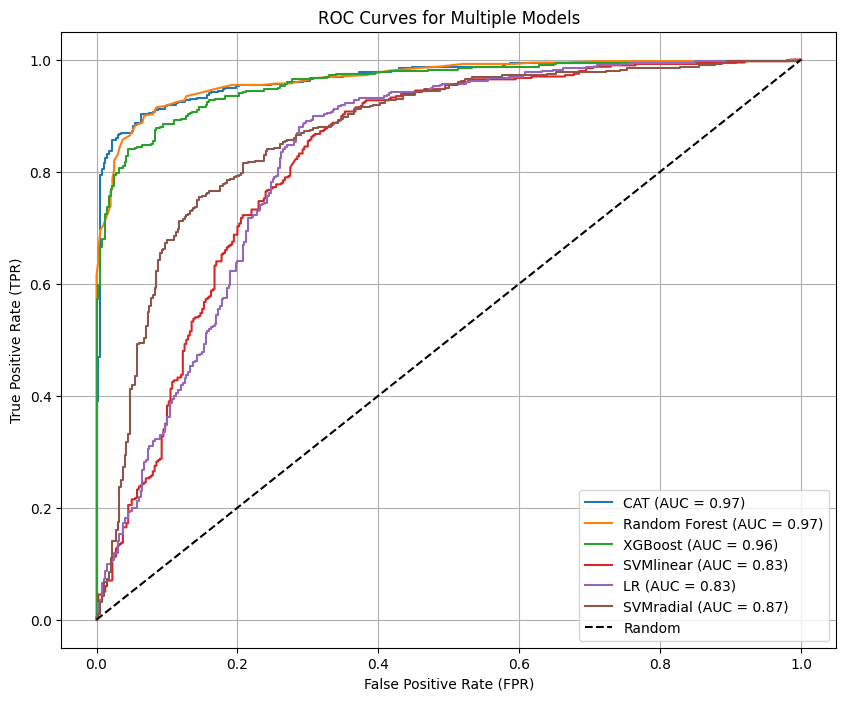


Métricas por Modelo:
       Modelo  Acurácia Média  F1 Score Médio  Precisão  Recall  Sensibilidade  Especificidade      AUC
          CAT         0.90875        0.909765  0.899756  0.9200         0.9200          0.8975 0.967588
Random Forest         0.91125        0.910467  0.918575  0.9025         0.9025          0.9200 0.967350
      XGBoost         0.88500        0.886420  0.875610  0.8975         0.8975          0.8725 0.959050
    SVMlinear         0.77250        0.786885  0.740088  0.8400         0.8400          0.7050 0.826200
           LR         0.76875        0.774665  0.755344  0.7950         0.7950          0.7425 0.826444
    SVMradial         0.79250        0.805621  0.757709  0.8600         0.8600          0.7250 0.868419


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, f1_score, precision_score,
    recall_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

# Lista de modelos para avaliação
modelos = {
    "CAT": CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=42),
#    "KNN": sklearn.neighbors.KNeighborsClassifier(),
    "SVMlinear": sklearn.svm.SVC(kernel="linear", probability=True, random_state=42),
    "LR": sklearn.linear_model.LogisticRegression(solver="newton-cg", random_state=42),
#    "DT": sklearn.tree.DecisionTreeClassifier(min_samples_split=2, random_state=42),
    "SVMradial": sklearn.svm.SVC(kernel="rbf", probability=True, random_state=42)
#    "MLP": MLPClassifier(solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=42, max_iter=500)


}

# Configuração da validação cruzada
cv = StratifiedKFold(n_splits=5)

# Inicializar uma lista para armazenar as métricas
resultados = []

# Criar uma figura para as curvas ROC
plt.figure(figsize=(10, 8))

# Loop pelos modelos
for nome, modelo in modelos.items():
    # Obter as probabilidades preditas usando cross-validation
    y_pred_prob = cross_val_predict(modelo, X_res1, y_res1, cv=cv, method="predict_proba")[:, 1]
    y_pred = cross_val_predict(modelo, X_res1, y_res1, cv=cv, method="predict")

    # Calcular as métricas da curva ROC
    fpr, tpr, _ = roc_curve(y_res1, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calcular outras métricas
    acuracia = accuracy_score(y_res1, y_pred)
    f1 = f1_score(y_res1, y_pred)
    precisao = precision_score(y_res1, y_pred)
    recall = recall_score(y_res1, y_pred)

    # Sensibilidade e especificidade
    cm = confusion_matrix(y_res1, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensibilidade = tp / (tp + fn)
    especificidade = tn / (tn + fp)

    # Adicionar resultados na lista
    resultados.append({
        "Modelo": nome,
        "Acurácia Média": acuracia,
        "F1 Score Médio": f1,
        "Precisão": precisao,
        "Recall": recall,
        "Sensibilidade": sensibilidade,
        "Especificidade": especificidade,
        "AUC": roc_auc
    })

    # Plotar a curva ROC
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {roc_auc:.2f})")

# Personalizar o gráfico
plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Linha de referência
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("plot.svg", format='svg')
plt.show()

# Converter resultados para DataFrame e exibir
tabela_resultados = pd.DataFrame(resultados)
print("\nMétricas por Modelo:")
print(tabela_resultados.to_string(index=False))

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_res1, np.squeeze(y_res1))

# KNN
knn = sklearn.neighbors.KNeighborsClassifier()


# Realizar a validação cruzada com 5 folds
scores_knn = cross_val_score(knn, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(knn, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_knn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.69125
F1 scores por fold: [0.75829384 0.75       0.76699029 0.75829384 0.77832512]
Média do F1 score: 0.7623806184279928


In [ ]:
# SVM
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svml = cross_val_score(svc_linear, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(svc_linear, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svml))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.7849999999999999
F1 scores por fold: [0.72619048 0.80446927 0.80239521 0.81212121 0.84745763]
Média do F1 score: 0.7985267597508374


In [ ]:
# SVM
svc_rbf = sklearn.svm.SVC(kernel="rbf", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svmr = cross_val_score(svc_rbf, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(svc_rbf, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svmr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.80375
F1 scores por fold: [0.73493976 0.8255814  0.83529412 0.83040936 0.84883721]
Média do F1 score: 0.8150123676119024


In [ ]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")

# Realizar a validação cruzada com 5 folds
scores_lr = cross_val_score(linear_lr, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(linear_lr, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_lr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.77875
F1 scores por fold: [0.7125     0.77011494 0.80246914 0.82634731 0.82142857]
Média do F1 score: 0.7865719910297996


In [ ]:
# Decision tree

dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)

# Realizar a validação cruzada com 10 folds
scores_dt = cross_val_score(dtree, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(dtree, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_dt))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.76625
F1 scores por fold: [0.68874172 0.72049689 0.78651685 0.81871345 0.79532164]
Média do F1 score: 0.761958111583225


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 5 folds
scores_rf = cross_val_score(rf_classifier, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(rf_classifier, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.9112499999999999
F1 scores por fold: [0.79194631 0.91823899 0.96296296 0.95757576 0.94545455]
Média do F1 score: 0.915235713685758


In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=0, max_iter=500)

# Realizar a validação cruzada com 10 folds
scores_nn = cross_val_score(nn, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(nn, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_nn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6587500000000001
F1 scores por fold: [0.         0.         0.         0.92485549 0.88636364]
Média do F1 score: 0.3622438255386232


In [ ]:
from xgboost import XGBClassifier

# XGB
XGB = XGBClassifier()

# Realizar a validação cruzada com 5 folds
scores_XGB = cross_val_score(XGB, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(XGB, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_XGB))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')



Acurácia Média: 0.885
F1 scores por fold: [0.77777778 0.84076433 0.94047619 0.92307692 0.92941176]
Média do F1 score: 0.8823013974493931


In [ ]:
cat = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)

# Realizar a validação cruzada com 5 folds
scores_cat = cross_val_score(cat, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(cat, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_cat))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

0:	learn: 0.6645648	total: 9.97ms	remaining: 2.98s
1:	learn: 0.6393342	total: 19.7ms	remaining: 2.94s
2:	learn: 0.6062385	total: 29.1ms	remaining: 2.88s
3:	learn: 0.5821249	total: 38.3ms	remaining: 2.83s
4:	learn: 0.5659170	total: 51.1ms	remaining: 3.02s
5:	learn: 0.5396071	total: 61.2ms	remaining: 3s
6:	learn: 0.5197620	total: 70.6ms	remaining: 2.96s
7:	learn: 0.4984904	total: 79.7ms	remaining: 2.91s
8:	learn: 0.4816568	total: 88.9ms	remaining: 2.87s
9:	learn: 0.4713653	total: 97.8ms	remaining: 2.84s
10:	learn: 0.4545516	total: 107ms	remaining: 2.81s
11:	learn: 0.4416707	total: 116ms	remaining: 2.79s
12:	learn: 0.4319654	total: 126ms	remaining: 2.78s
13:	learn: 0.4184968	total: 135ms	remaining: 2.76s
14:	learn: 0.4074184	total: 147ms	remaining: 2.79s
15:	learn: 0.3930586	total: 156ms	remaining: 2.78s
16:	learn: 0.3804412	total: 166ms	remaining: 2.76s
17:	learn: 0.3694094	total: 175ms	remaining: 2.74s
18:	learn: 0.3557407	total: 184ms	remaining: 2.73s
19:	learn: 0.3462076	total: 194ms	

Outra técnica implementada dentro do imbalanced-learn, semelhante ao SMOTE, mas gera mais exemplos para as amostras minoritárias mais difíceis.

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_res2, y_res2 = adasyn.fit_resample(X, y)


In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_res2, np.squeeze(y_res2))

# KNN
knn = sklearn.neighbors.KNeighborsClassifier()


# Realizar a validação cruzada com 5 folds
scores_knn = cross_val_score(knn, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(knn, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_knn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6615980004837538
F1 scores por fold: [0.73584906 0.73737374 0.71794872 0.72727273 0.76530612]
Média do F1 score: 0.7367500723295871


In [ ]:
# SVM
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svml = cross_val_score(svc_linear, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(svc_linear, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svml))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.759542046279126
F1 scores por fold: [0.7625     0.81564246 0.74213836 0.67567568 0.82840237]
Média do F1 score: 0.7648717730840027


In [ ]:
# SVM
svc_rbf = sklearn.svm.SVC(kernel="rbf", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svmr = cross_val_score(svc_rbf, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(svc_rbf, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svmr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.7723292751753608
F1 scores por fold: [0.72151899 0.8        0.7672956  0.7672956  0.83832335]
Média do F1 score: 0.7788867071207479


In [ ]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")

# Realizar a validação cruzada com 5 folds
scores_lr = cross_val_score(linear_lr, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(linear_lr, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_lr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.7544868177053938
F1 scores por fold: [0.72955975 0.82285714 0.74666667 0.66666667 0.8       ]
Média do F1 score: 0.7531500449236297


In [ ]:
# Decision tree

dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)

# Realizar a validação cruzada com 5 folds
scores_dt = cross_val_score(dtree, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(dtree, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_dt))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.7150528098040797
F1 scores por fold: [0.69503546 0.6626506  0.77419355 0.71621622 0.74534161]
Média do F1 score: 0.7186874885825384


In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 5 folds
scores_rf = cross_val_score(rf_classifier, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(rf_classifier, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.902104329597678
F1 scores por fold: [0.82432432 0.94805195 0.91891892 0.91719745 0.90196078]
Média do F1 score: 0.9020906855676433


In [ ]:
nn = MLPClassifier(
    solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=0, max_iter=500)

# Realizar a validação cruzada com 5 folds
scores_nn = cross_val_score(nn, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(nn, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_nn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.7721518987341772
F1 scores por fold: [0.85714286 0.         0.83783784 0.9112426  0.76300578]
Média do F1 score: 0.6738458157755624


In [ ]:
# XGB
XGB = XGBClassifier()

# Realizar a validação cruzada com 5 folds
scores_XGB = cross_val_score(XGB, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(XGB, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_XGB))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.8970732887204708
F1 scores por fold: [0.77464789 0.92903226 0.925      0.925      0.91358025]
Média do F1 score: 0.8934520784604079


In [ ]:
cat = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)

# Realizar a validação cruzada com 5 folds
scores_cat = cross_val_score(cat, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(cat, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_cat))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

0:	learn: 0.6656972	total: 18.7ms	remaining: 5.59s
1:	learn: 0.6372466	total: 36.9ms	remaining: 5.5s
2:	learn: 0.6091671	total: 57.8ms	remaining: 5.73s
3:	learn: 0.5853180	total: 78.5ms	remaining: 5.81s
4:	learn: 0.5646602	total: 99.2ms	remaining: 5.85s
5:	learn: 0.5492146	total: 120ms	remaining: 5.88s
6:	learn: 0.5330014	total: 138ms	remaining: 5.79s
7:	learn: 0.5179059	total: 160ms	remaining: 5.83s
8:	learn: 0.5027594	total: 182ms	remaining: 5.89s
9:	learn: 0.4872538	total: 203ms	remaining: 5.88s
10:	learn: 0.4737065	total: 225ms	remaining: 5.92s
11:	learn: 0.4567415	total: 245ms	remaining: 5.89s
12:	learn: 0.4378222	total: 268ms	remaining: 5.92s
13:	learn: 0.4258791	total: 290ms	remaining: 5.92s
14:	learn: 0.4131919	total: 310ms	remaining: 5.89s
15:	learn: 0.4043149	total: 329ms	remaining: 5.84s
16:	learn: 0.3932165	total: 338ms	remaining: 5.63s
17:	learn: 0.3824996	total: 347ms	remaining: 5.44s
18:	learn: 0.3699843	total: 356ms	remaining: 5.26s
19:	learn: 0.3564666	total: 365ms	rem

Técnica de subamostragem que seleciona exemplos da classe majoritária que estão mais próximos dos exemplos da classe minoritária.

In [ ]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_res3, y_res3 = nearmiss.fit_resample(X, y)


In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_res3, np.squeeze(y_res3))

# KNN
knn = sklearn.neighbors.KNeighborsClassifier()


# Realizar a validação cruzada com 5 folds
scores_knn = cross_val_score(knn, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(knn, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_knn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.5809388335704126
F1 scores por fold: [0.30769231 0.32       0.56       0.26086957 0.4       ]
Média do F1 score: 0.36971237458193984


In [ ]:
# SVM
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svml = cross_val_score(svc_linear, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(svc_linear, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svml))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.5534850640113798
F1 scores por fold: [0.57142857 0.42105263 0.58823529 0.52941176 0.55555556]
Média do F1 score: 0.5331367634773206


In [ ]:
# SVM
svc_rbf = sklearn.svm.SVC(kernel="rbf", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svmr = cross_val_score(svc_rbf, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(svc_rbf, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svmr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6990042674253201
F1 scores por fold: [0.53846154 0.75675676 0.66666667 0.66666667 0.53333333]
Média do F1 score: 0.6323769923769923


In [ ]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")

# Realizar a validação cruzada com 5 folds
scores_lr = cross_val_score(linear_lr, X_res2, np.squeeze(y_res2), cv=5)
f1_scores = cross_val_score(linear_lr, X_res2, y_res2, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_lr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.7544868177053938
F1 scores por fold: [0.72955975 0.82285714 0.74666667 0.66666667 0.8       ]
Média do F1 score: 0.7531500449236297


In [ ]:
# Decision tree

dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)

# Realizar a validação cruzada com 5 folds
scores_dt = cross_val_score(dtree, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(dtree, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_dt))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.5533428165007113
F1 scores por fold: [0.62857143 0.5        0.63157895 0.52941176 0.47058824]
Média do F1 score: 0.55203007518797


In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 5 folds
scores_rf = cross_val_score(rf_classifier, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(rf_classifier, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6825035561877667
F1 scores por fold: [0.6875     0.68421053 0.68421053 0.57142857 0.52941176]
Média do F1 score: 0.6313522777532065


In [ ]:
nn = MLPClassifier(
    solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=0, max_iter=500)

# Realizar a validação cruzada com 5 folds
scores_nn = cross_val_score(nn, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(nn, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_nn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')



Acurácia Média: 0.656330014224751
F1 scores por fold: [0.52941176 0.59459459 0.66666667 0.74285714 0.66666667]
Média do F1 score: 0.6400393670981905


In [ ]:
# XGB
XGB = XGBClassifier()

# Realizar a validação cruzada com 5 folds
scores_XGB = cross_val_score(XGB, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(XGB, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_XGB))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6182076813655761
F1 scores por fold: [0.58823529 0.7        0.66666667 0.57142857 0.47058824]
Média do F1 score: 0.5993837535014006


In [ ]:
cat = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)

# Realizar a validação cruzada com 5 folds
scores_cat = cross_val_score(cat, X_res3, np.squeeze(y_res3), cv=5)
f1_scores = cross_val_score(cat, X_res3, y_res3, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_cat))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


0:	learn: 0.6709104	total: 4.73ms	remaining: 1.42s
1:	learn: 0.6431865	total: 9.38ms	remaining: 1.4s
2:	learn: 0.6226165	total: 13.7ms	remaining: 1.35s
3:	learn: 0.5952637	total: 19ms	remaining: 1.4s
4:	learn: 0.5629023	total: 23.3ms	remaining: 1.38s
5:	learn: 0.5478389	total: 27.5ms	remaining: 1.35s
6:	learn: 0.5301050	total: 31.7ms	remaining: 1.32s
7:	learn: 0.5003290	total: 35.9ms	remaining: 1.31s
8:	learn: 0.4766650	total: 40ms	remaining: 1.29s
9:	learn: 0.4540020	total: 44.4ms	remaining: 1.29s
10:	learn: 0.4335242	total: 48.6ms	remaining: 1.28s
11:	learn: 0.4208570	total: 52.8ms	remaining: 1.27s
12:	learn: 0.4067351	total: 57.4ms	remaining: 1.27s
13:	learn: 0.3930385	total: 61.7ms	remaining: 1.26s
14:	learn: 0.3778376	total: 66ms	remaining: 1.25s
15:	learn: 0.3653505	total: 70.3ms	remaining: 1.25s
16:	learn: 0.3514503	total: 74.6ms	remaining: 1.24s
17:	learn: 0.3467709	total: 78.9ms	remaining: 1.24s
18:	learn: 0.3374345	total: 83.5ms	remaining: 1.24s
19:	learn: 0.3203027	total: 87

In [ ]:
df_amostragem = df[df['ajcc.stage'] == 0]
classe1_df = df[df['ajcc.stage'] == 1]

# Amostrar 100 indivíduos da classe específica
amostra = df_amostragem.sample(n=200, random_state=42)

# Combinar os 100 indivíduos amostrados com todos os indivíduos da outra classe específica
amostra_final = pd.concat([amostra, classe1_df])

# Exibir a amostra final
print(amostra_final)


    neoplasm metastasis  ajcc.stage  obs.time  status   age  gender  prior.dx  \
250       N1         M0           0       383       1  71.0       1         0   
347       N0         M0           0       366       1  65.0       1         0   
34        N3         M0           0       123       1  73.0       1         0   
251       N0         M0           0      1841       0  67.0       1         0   
109       N0         M0           0       412       1  60.0       1         0   
..       ...        ...         ...       ...     ...   ...     ...       ...   
475       N1         M0           1       307       1  70.0       1         0   
476       N0         M0           1       734       0  53.0       1         0   
487       N1         M0           1       195       1  57.0       1         0   
488       N1        NaN           1        12       1  65.0       1         0   
491       N1         M1           1       716       1  73.0       1         0   

          GCLC      WNT16  

In [ ]:
amostra_final[amostra_final['ajcc.stage'] == 0]['status'].value_counts()

,count
status,
0,108
1,92


In [ ]:
amostra_final[amostra_final['ajcc.stage'] == 1]['status'].value_counts()

,count
status,
1,48
0,45


In [ ]:
df1 = amostra_final[Genes_selc]
print(df1)

       ALDH3B1      ALG1L         C7       CAV1     CENPI      GKN2  \
250  14.397474   8.764872  10.396605  11.733439  7.651052  4.459432   
347   9.881114  10.680360  10.152285  14.224228  8.891784  3.169925   
34    9.911392   7.839204  13.722381  12.982459  8.994353  7.491853   
251   7.936638   6.807355   9.321928  10.468624  8.447083  3.169925   
109   9.586840   6.930737  11.665780  11.776433  8.189825  6.357552   
..         ...        ...        ...        ...       ...       ...   
475   8.055282   9.147205   7.499846  11.231221  9.294621  2.584963   
476   8.233620   9.941048   9.791163  11.239002  7.918863  3.807355   
487   8.060696  10.829723   5.285402  11.948732  7.748193  1.000000   
488   7.982994  10.807355   9.355351  10.793603  8.870365  3.000000   
491   9.219169  10.767357   9.400879  14.595316  8.734710  1.584963   

        GPRC5A    H2AC14  LINC00887     MMP20  ...   ONECUT3  IMPDH1P8  \
250  13.187661  1.000000   3.807355  0.000000  ...  0.000000  3.700440   

In [ ]:
data = pd.DataFrame(amostra_final)

In [ ]:
#Preparing input and output variables
X1 = df1
y1 = data[data.columns[2:3]]


In [ ]:
print(y1)

     ajcc.stage
250           0
347           0
34            0
251           0
109           0
..          ...
475           1
476           1
487           1
488           1
491           1

[293 rows x 1 columns]


In [ ]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0
#)

In [ ]:
y1 = y1.values.ravel()

In [ ]:
# KNN
knn = sklearn.neighbors.KNeighborsClassifier()


# Realizar a validação cruzada com 5 folds
scores_knn = cross_val_score(knn, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(knn, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_knn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6213325540619521
F1 scores por fold: [0.20689655 0.1875     0.22222222 0.15384615 0.38709677]
Média do F1 score: 0.2315123403972125


In [ ]:
# SVM
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)


# Realizar a validação cruzada com 10 folds
scores_svml = cross_val_score(svc_linear, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(svc_linear, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svml))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6622443015780245
F1 scores por fold: [0.4375     0.47368421 0.25       0.58823529 0.41025641]
Média do F1 score: 0.43193518298007455


In [ ]:
# SVM
svc_rbf = sklearn.svm.SVC(kernel="rbf", probability=True)


# Realizar a validação cruzada com 5 folds
scores_svmr = cross_val_score(svc_rbf, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(svc_rbf, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_svmr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6826417299824664
F1 scores por fold: [0. 0. 0. 0. 0.]
Média do F1 score: 0.0


In [ ]:
# Logistic regression
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")

# Realizar a validação cruzada com 10 folds
scores_lr = cross_val_score(linear_lr, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(linear_lr, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_lr))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')



Acurácia Média: 0.6690824079485681
F1 scores por fold: [0.38709677 0.43243243 0.36363636 0.54545455 0.43243243]
Média do F1 score: 0.4322105096298644


In [ ]:
import sklearn.tree

# Decision tree

dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)

# Realizar a validação cruzada com 10 folds
scores_dt = cross_val_score(dtree, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(dtree, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_dt))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.5703097603740502
F1 scores por fold: [0.29268293 0.29268293 0.4        0.5        0.34285714]
Média do F1 score: 0.3656445993031359


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 10 folds
scores_rf = cross_val_score(rf_classifier, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(rf_classifier, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6622443015780246
F1 scores por fold: [0.17391304 0.08333333 0.09090909 0.08695652 0.2       ]
Média do F1 score: 0.1270223978919631


In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    solver="adam", alpha=1e-1, hidden_layer_sizes= (100, 50, 25, 2),activation="relu", random_state=0, max_iter=700)

# Realizar a validação cruzada com 10 folds
scores_nn = cross_val_score(nn, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(nn, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_nn))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


Acurácia Média: 0.6826417299824664
F1 scores por fold: [0. 0. 0. 0. 0.]
Média do F1 score: 0.0


In [ ]:
from xgboost import XGBClassifier

# XGB
XGB = XGBClassifier()

# Realizar a validação cruzada com 5 folds
scores_XGB = cross_val_score(XGB, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(XGB, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_XGB))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.6483927527761544
F1 scores por fold: [0.3125     0.32258065 0.30769231 0.3030303  0.2962963 ]
Média do F1 score: 0.30841991043603945


In [ ]:
import catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)

# Realizar a validação cruzada com 5 folds
scores_cat = cross_val_score(cat, X1, np.squeeze(y1), cv=5)
f1_scores = cross_val_score(cat, X1, y1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_cat))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')


0:	learn: 0.6530847	total: 7.61ms	remaining: 2.28s
1:	learn: 0.6196530	total: 13.3ms	remaining: 1.98s
2:	learn: 0.5948640	total: 19.3ms	remaining: 1.92s
3:	learn: 0.5694350	total: 25.3ms	remaining: 1.87s
4:	learn: 0.5417281	total: 31.4ms	remaining: 1.85s
5:	learn: 0.5280724	total: 37.6ms	remaining: 1.84s
6:	learn: 0.5076597	total: 43.9ms	remaining: 1.83s
7:	learn: 0.4957857	total: 49.9ms	remaining: 1.82s
8:	learn: 0.4774444	total: 56.2ms	remaining: 1.81s
9:	learn: 0.4658871	total: 62.2ms	remaining: 1.8s
10:	learn: 0.4416685	total: 69.1ms	remaining: 1.81s
11:	learn: 0.4347897	total: 75.1ms	remaining: 1.8s
12:	learn: 0.4229597	total: 80.9ms	remaining: 1.79s
13:	learn: 0.4066498	total: 91ms	remaining: 1.86s
14:	learn: 0.3931331	total: 103ms	remaining: 1.96s
15:	learn: 0.3856717	total: 115ms	remaining: 2.04s
16:	learn: 0.3738737	total: 121ms	remaining: 2.02s
17:	learn: 0.3581832	total: 127ms	remaining: 2s
18:	learn: 0.3482914	total: 133ms	remaining: 1.97s
19:	learn: 0.3349041	total: 139ms	